In [3]:
states=['recover','grouth','stable','bubble','reform','now']
dates=["1949/5/16","1954/12/1","1972/1/1","1986/12/1","1993/11/1","2016/9/30"]
print(states)
print(dates)

['recover', 'grouth', 'stable', 'bubble', 'reform', 'now']
['1949/5/16', '1954/12/1', '1972/1/1', '1986/12/1', '1993/11/1', '2016/9/30']


In [8]:
import pandas_datareader.data as pdr
import numpy as np
end ='2016/9/30'
n225 = pdr.DataReader('NIKKEI225', 'fred', '1949/5/16', end).NIKKEI225
print('rate of change')
for i in range(len(dates) -1):
    ave=n225[dates[i]:dates[i+1]].pct_change().mean()*250
    print(states[i],': %2.2f ％;'%(ave*100))
print()
print('volatility')
for i in range(len(dates) -1):
    vol=np.log(n225[dates[i]:dates[i+1]]).diff().std()*np.sqrt(250)
    print(states[i],': %2.2f ％;'%(vol*100))

rate of change
recover : 13.71 ％;
grouth : 13.47 ％;
stable : 13.48 ％;
bubble : 3.49 ％;
reform : 2.16 ％;

volatility
recover : 22.99 ％;
grouth : 14.45 ％;
stable : 12.64 ％;
bubble : 22.82 ％;
reform : 23.54 ％;


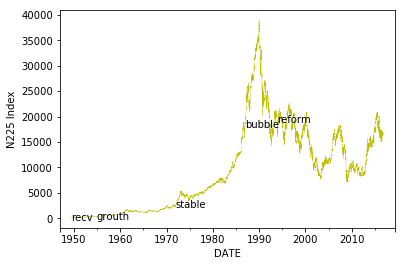

In [10]:
struct_break = [("1949/5/16", 'recv'),("1954/12/1", 'grouth'),
                ("1972/1/1", 'stable'),("1986/12/1", 'bubble'),("1993/11/1",'reform')]
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
g=fig.add_subplot(1,1,1)
n225.plot(ax=g,style='y--',linewidth=0.5)
plt.ylabel('N225 Index')
for date, label in struct_break:
    g.annotate(label, xy=(date, n225.asof(date)+1000),
               xytext=(date,n225.asof(date)+1000),
               horizontalalignment='left', verticalalignment='top')
    g.set_xlim(['1947/1/1','2019/4/25'])
plt.title=('N225 and structual change')

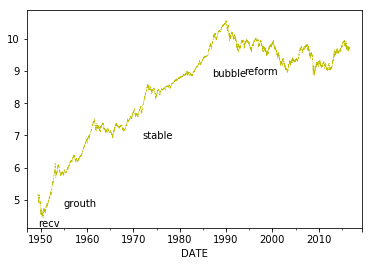

In [17]:
# 対数価格
%matplotlib inline
fig = plt.figure()
g = fig.add_subplot(1,1,1)
ln_n225=np.log(n225)
ln_n225.plot(ax=g,style='y--',linewidth=0.5)
for date, label in struct_break:
    g.annotate(label, xy=(date, ln_n225.asof(date)),
               xytext=(date, ln_n225.asof(date)-0.75),
               horizontalalignment='left', verticalalignment='top')
g.set_xlim(['1947/1/1','2019/4/25'])
plt.title=('Log N225 and structual change')

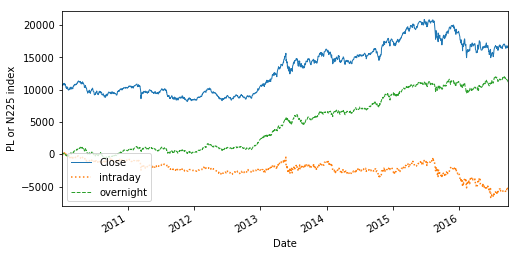

In [27]:
plt.figure(figsize=(8,4))
analysis = pdr.DataReader('^N225', 'yahoo', '2010/1/4', end)
analysis['intraday']=0
analysis['overnight']=0
c0=analysis.Close.iloc[0]
for i in range(1, len(analysis)):
    o=analysis.iloc[i,0]
    c=analysis.iloc[i,3]
    analysis.iloc[i,6]=c-o
    analysis.iloc[i,7]=o-c0
    c0=c
analysis.Close.plot(label='Close',linewidth=1)
analysis.intraday.cumsum().plot(label='intraday',linestyle=':')
analysis.overnight.cumsum().plot(label='overnight',linestyle='--', linewidth=1)
plt.legend()
plt.ylabel('PL or N225 index')
plt.legend(loc='lower left')

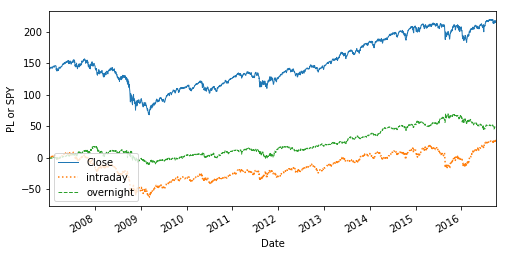

In [32]:
plt.figure(figsize=(8,4))
analysis = pdr.DataReader('SPY', 'yahoo', '2007/1/4', end)
analysis['intraday']=0
analysis['overnight']=0
c0=analysis.Close.iloc[0]
for i in range(1, len(analysis)):
    o=analysis.iloc[i,0]
    c=analysis.iloc[i,3]
    analysis.iloc[i,6]=c-o
    analysis.iloc[i,7]=o-c0
    c0=c
analysis.Close.plot(label='Close',linewidth=1)
analysis.intraday.cumsum().plot(label='intraday',linestyle=':')
analysis.overnight.cumsum().plot(label='overnight',linestyle='--', linewidth=1)
plt.legend()
plt.ylabel('PL or SPY')
plt.legend(loc='lower left')


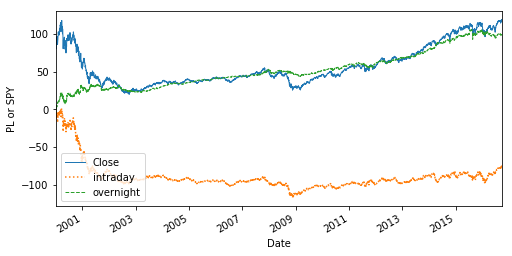

In [34]:
plt.figure(figsize=(8,4))
analysis = pdr.DataReader('QQQ', 'yahoo', '2000/1/4', end)
analysis['intraday']=0
analysis['overnight']=0
c0=analysis.Close.iloc[0]
for i in range(1, len(analysis)):
    o=analysis.iloc[i,0]
    c=analysis.iloc[i,3]
    analysis.iloc[i,6]=c-o
    analysis.iloc[i,7]=o-c0
    c0=c
analysis.Close.plot(label='Close',linewidth=1)
analysis.intraday.cumsum().plot(label='intraday',linestyle=':')
analysis.overnight.cumsum().plot(label='overnight',linestyle='--', linewidth=1)
plt.legend()
plt.ylabel('PL or QQQ')
plt.legend(loc='lower left')
